In [3]:
import os
import pandas as pd
import json

# 加载原始 JSON 数据
json_path = "/vepfs/fs_projects/FunMG/LLM/dataset/datasets--GreatCaptainNemo--HME_dataset/snapshots/934c6a76f50e1f90eb83abdbc8b5366dde00639e/desc2mol_train.json"

with open(json_path, "r") as f:
    raw_data = json.load(f)

In [4]:
raw_data

[{'smiles': 'CCCCC[C@@H]1O[C@@H]1/C=C/C(O)C/C=C\\C/C=C\\CCCC(=O)[O-]',
  'selfies': '',
  'description': 'The molecule is an epoxy(hydroxy)icosatrienoate that is the conjugate base of 11 hydroxy-(14R,15S)-epoxy-(5Z,8Z,12E)-icosatrienoic acid, obtained by deprotonation of the carboxy group; major species at pH 7.3. It is a conjugate base of an 11 hydroxy-(14R,15S)-epoxy-(5Z,8Z,12E)-icosatrienoic acid.',
  'fragments': '<|O|><|CC|><|CC|><|CC|><|CCC|><|CCO|><|CCC=O|><|CCCCCCO|>',
  'metadata': {}},
 {'smiles': '[125Te]',
  'selfies': '',
  'description': 'The molecule is the stable isotope of tellurium with relative atomic mass 124.904425, 71.4 atom percent natural abundance and nuclear spin 1/2.',
  'fragments': '',
  'metadata': {}},
 {'smiles': 'CC(=O)O[C@@H]1C[C@H]2C(C)(C)C(=O)C=C[C@]2(C)[C@H]2CC[C@]3(C)C(=CC[C@H]3c3ccoc3)[C@@]21C',
  'selfies': '',
  'description': 'The molecule is a tetracyclic triterpenoid that is 4,4,8-trimethylandrosta-1,14-diene substituted by an oxo group at po

In [3]:
import os
import json
import pandas as pd
from rdkit import Chem

# 加载 JSON 数据
json_path = "/vepfs/fs_projects/FunMG/LLM/dataset/datasets--GreatCaptainNemo--HME_dataset/snapshots/934c6a76f50e1f90eb83abdbc8b5366dde00639e/desc2mol_train.json"
with open(json_path, "r") as f:
    raw_data = json.load(f)

# 过滤合法 SMILES 并去重
valid_samples = []
seen_smiles = set()

for item in raw_data:
    smiles = item.get("smiles", "")
    mol = Chem.MolFromSmiles(smiles)
    if mol and smiles not in seen_smiles:
        seen_smiles.add(smiles)
        valid_samples.append({
            "input": item["description"],
            "output": smiles,
            "fragments": item["fragments"]
        })

# 转换为 DataFrame
df = pd.DataFrame(valid_samples)

[03:34:30] WARNING: not removing hydrogen atom without neighbors
[03:34:30] WARNING: not removing hydrogen atom without neighbors
[03:34:30] WARNING: not removing hydrogen atom without neighbors
[03:34:30] WARNING: not removing hydrogen atom without neighbors
[03:34:31] WARNING: not removing hydrogen atom without neighbors
[03:34:31] WARNING: not removing hydrogen atom without neighbors
[03:34:31] WARNING: not removing hydrogen atom without neighbors
[03:34:31] WARNING: not removing hydrogen atom without neighbors
[03:34:31] WARNING: not removing hydrogen atom without neighbors
[03:34:31] WARNING: not removing hydrogen atom without neighbors
[03:34:31] WARNING: not removing hydrogen atom without neighbors
[03:34:31] WARNING: not removing hydrogen atom without neighbors
[03:34:31] WARNING: not removing hydrogen atom without neighbors
[03:34:32] WARNING: not removing hydrogen atom without neighbors
[03:34:32] WARNING: not removing hydrogen atom without neighbors
[03:34:32] WARNING: not r

In [2]:
df

,instruction,input,output,fragments
0,Please design a molecule based on the followin...,The molecule is an epoxy(hydroxy)icosatrienoat...,CCCCC[C@@H]1O[C@@H]1/C=C/C(O)C/C=C\C/C=C\CCCC(...,<|O|><|CC|><|CC|><|CC|><|CCC|><|CCO|><|CCC=O|>...
1,Please design a molecule based on the followin...,The molecule is the stable isotope of telluriu...,[125Te],
2,Please design a molecule based on the followin...,The molecule is a tetracyclic triterpenoid tha...,CC(=O)O[C@@H]1C[C@H]2C(C)(C)C(=O)C=C[C@]2(C)[C...,<|CCC|><|CCC|><|CCC|><|CC=O|><|CC(C)C|><|c1cco...
3,Please design a molecule based on the followin...,The molecule is a member of the class of N-nit...,CN(N=O)C(N)=O,<|N|><|O|><|CN|><|NC=O|>
4,Please design a molecule based on the followin...,The molecule is an indole phytoalexin that is ...,c1ccc2c(-c3nccs3)c[nH]c2c1,<|c1cscn1|><|c1ccc2[nH]ccc2c1|>
...,...,...,...,...
26402,Please design a molecule based on the followin...,The molecule is a N-acyl-beta-D-galactosylsphi...,CCCCCCCCCCCCC/C=C/[C@@H](O)[C@H](CO[C@@H]1O[C@...,<|O|><|CCC|><|CCO|><|OCCO|><|CCCCCCCC|><|CCCCC...
26403,Please design a molecule based on the followin...,The molecule is a D-alpha-amino acid that is D...,C[C@H](CCN)[C@@H](N)C(=O)O,<|CCCCN|><|NCC(=O)O|>
26404,Please design a molecule based on the followin...,The molecule is an acyl-CoA(4-) arising from d...,CC/C=C\C/C=C\C/C=C\C/C=C\C/C=C\C/C=C\CCCCCCCCC...,<|S|><|O|><|O|><|O|><|O|><|CO|><|CO|><|CCC|><|...
26405,Please design a molecule based on the followin...,The molecule is an inositol phosphomannosylino...,CCCCCCCCCCCCCCCCCCCCCCCCCC(=O)N[C@@H](COP(=O)(...,<|CCO|><|OCCO|><|OCCO|><|OCCO|><|OCCO|><|OCCO|...


In [1]:
Chem.MolFromSmiles('CC([N+])[N+]([N+]N)C(c1nc(O)c[nH]n3[c@H](c(n1)c2c1)n3c(cc2ccc2N[C@H](O)[C@H](O))cn2)O')

NameError: name 'Chem' is not defined

In [5]:
from rdkit import Chem

mol = Chem.MolFromSmiles('[125Te]')
print(mol is not None)  # True ✅
print(mol.GetNumAtoms())  # 1
print(Chem.MolToSmiles(mol))  # '[125Te]'


True
1
[125Te]


In [6]:
from transformers import AutoTokenizer

model_path = "/vepfs/fs_projects/FunMG/LLM/model_weight/qwen/Qwen2___5-7B-Instruct"
tokenizer = AutoTokenizer.from_pretrained(model_path, trust_remote_code=True)


In [8]:
tokenizer.tokenize('[125Te]')

['[', '1', '2', '5', 'Te', ']']

In [9]:
tokenizer('[125Te]').input_ids

[58, 16, 17, 20, 6639, 60]

In [11]:
import os
import json
import pandas as pd
from rdkit import Chem
from transformers import AutoTokenizer
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit import rdBase
from rdkit import RDLogger
from typing import List, Tuple, Dict
from rdkit import Chem
from rdkit.Chem import rdmolops, AllChem
from rdkit.Chem import Draw
rdBase.DisableLog('rdApp.error')
RDLogger.DisableLog('rdApp.warning')
RDLogger.DisableLog('rdApp.*')

json_path = "/vepfs/fs_projects/FunMG/LLM/dataset/datasets--GreatCaptainNemo--HME_dataset/snapshots/934c6a76f50e1f90eb83abdbc8b5366dde00639e/desc2mol_train.json"
with open(json_path, "r") as f:
    raw_data = json.load(f)

valid_samples = []
seen_smiles = set()

for item in raw_data:
    smiles = item.get("smiles", "")
    mol = Chem.MolFromSmiles(smiles)
    if mol and smiles not in seen_smiles:
        seen_smiles.add(smiles)
        valid_samples.append({
            "input": item["description"],
            "output": smiles,
            "fragments": item.get("fragments", "")
        })

df = pd.DataFrame(valid_samples)

model_path = "/vepfs/fs_projects/FunMG/LLM/model_weight/qwen/Qwen2___5-7B-Instruct"
tokenizer = AutoTokenizer.from_pretrained(model_path, trust_remote_code=True)

def has_oov(smiles: str, tokenizer) -> bool:
    tokens = tokenizer.tokenize(smiles)
    return any(tok in {"[UNK]", "<unk>"} for tok in tokens)

df["has_oov"] = df["output"].apply(lambda x: has_oov(x, tokenizer))

# ==== Step 5: 输出统计信息 ====
num_oov = df["has_oov"].sum()
total = len(df)
print(f"❗ OOV SMILES: {num_oov} / {total} ({num_oov / total:.2%})")

# ==== Step 6: 可选：打印部分 OOV 示例 ====
print("\n🔎 Example SMILES with OOV tokens:")
print(df[df["has_oov"]].head(5)[["output"]])


❗ OOV SMILES: 0 / 26407 (0.00%)

🔎 Example SMILES with OOV tokens:
Empty DataFrame
Columns: [output]
Index: []


In [12]:
import os
import json
import pandas as pd
from rdkit import Chem
from transformers import AutoTokenizer
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit import rdBase
from rdkit import RDLogger
from typing import List, Tuple, Dict
from rdkit import Chem
from rdkit.Chem import rdmolops, AllChem
from rdkit.Chem import Draw
rdBase.DisableLog('rdApp.error')
RDLogger.DisableLog('rdApp.warning')
RDLogger.DisableLog('rdApp.*')

json_path = "/vepfs/fs_projects/FunMG/LLM/dataset/datasets--GreatCaptainNemo--HME_dataset/snapshots/934c6a76f50e1f90eb83abdbc8b5366dde00639e/desc2mol_test.json"
with open(json_path, "r") as f:
    raw_data = json.load(f)

valid_samples = []
seen_smiles = set()

for item in raw_data:
    smiles = item.get("smiles", "")
    mol = Chem.MolFromSmiles(smiles)
    if mol and smiles not in seen_smiles:
        seen_smiles.add(smiles)
        valid_samples.append({
            "input": item["description"],
            "output": smiles,
            "fragments": item.get("fragments", "")
        })

df = pd.DataFrame(valid_samples)

model_path = "/vepfs/fs_projects/FunMG/LLM/model_weight/qwen/Qwen2___5-7B-Instruct"
tokenizer = AutoTokenizer.from_pretrained(model_path, trust_remote_code=True)

def has_oov(smiles: str, tokenizer) -> bool:
    tokens = tokenizer.tokenize(smiles)
    return any(tok in {"[UNK]", "<unk>"} for tok in tokens)

df["has_oov"] = df["output"].apply(lambda x: has_oov(x, tokenizer))

# ==== Step 5: 输出统计信息 ====
num_oov = df["has_oov"].sum()
total = len(df)
print(f"❗ OOV SMILES: {num_oov} / {total} ({num_oov / total:.2%})")

# ==== Step 6: 可选：打印部分 OOV 示例 ====
print("\n🔎 Example SMILES with OOV tokens:")
print(df[df["has_oov"]].head(5)[["output"]])


❗ OOV SMILES: 0 / 3300 (0.00%)

🔎 Example SMILES with OOV tokens:
Empty DataFrame
Columns: [output]
Index: []


In [ ]:
solution = "### Final Answer:
```
#### C/C=C\C/C=C\C=CC[C@@H](O)C[C@H]1CO1CCCCCCCC(=O)[O-] ####
```
"

def extract_solution(solution_str, method="strict"):
    assert method in ["strict", "flexible"]
    
    if method == "strict":
        # this also tests the formatting of the model
        solution = re.search("#### (\\-?[0-9\\.\\,]+)", solution_str)
        if solution is None:
            final_answer = None
        else:
            final_answer = solution.group(0)
            final_answer = final_answer.split("#### ")[1].replace(",", "").replace("$", "")
    elif method == "flexible":
        answer = re.findall("(\\-?[0-9\\.\\,]+)", solution_str)
        final_answer = None
        if len(answer) == 0:
            # no reward is there is no answer
            pass
        else:
            invalid_str = ["", "."]
            # find the last number that is not '.'
            for final_answer in reversed(answer):
                if final_answer not in invalid_str:
                    break
    return final_answer

## gpt-4o test

In [8]:
respon_1 = """
Response 1: To generate the SMILES representation for the described molecule, let's break down the components:

1. **Molecule Classification**: We are dealing with a steroid ester derived from a pregnane, specifically a methyl ester of a (17E)-pregna-4,17-dien-21-oate.

2. **Key Features**:
   - The core structure is a pregnane, which typically consists of a steroid skeleton with four fused rings.
   - It has double bonds in the structure indicated by "dien".
   - There are oxo (ketone) groups at positions 3 and 11, indicating carbonyl (=O) groups.
   - It's a methyl ester, so there is a -COOCH3 group at position 21.

3. **Positioning and Configuration**:
   - (17E) involves the configuration of the double bond at position 17.
   - The other features, like the oxo groups, need to be positioned correctly as described.

Combining these fragments into the SMILES based on the structural details and common conventions will yield the final representation.

The synthesis of the SMILES string looks like this:
- Start with the steroid backbone (C structure).
- Add the methyl ester group (-COOCH3) at the appropriate position.
- Add the oxo groups (=O) at the 3 and 11 positions.
- Properly label the stereochemistry and any double bonds.

The final SMILES notation for this molecule is:

<answer> C[C@H]1[C@@H]2CC[C@H]3C(=O)[C@H](C=C4C(=C3C2=C1)C(=O)C(=C4)C)[C@H](C)[C@H](O)=O </answer> 

This representation encapsulates the steroid ester's structure, ketone functionalities, and methyl ester while respecting stereochemistry.
"""

respon_2 = """
Response 2: To generate the SMILES string for the given molecule, let's break down the provided description step by step:

1. **Starting with Steroid Backbone**: The molecule is based on a pregnane structure, which is a type of steroid. Pregnane typically has the structural formula of C21H36, forming four fused cyclohexane rings. 

2. **Specific Structure**: It has double bonds indicated as pregna-4,17-dien, meaning double bonds are present at the 4 position and 17 position. The steroid backbone must adjust to form these double bonds.

3. **Substitution and Ester Formation**: It is an ester, specifically methyl ester at the 21st position, indicating a methoxy carbonyl group (-COOCH3) attached to the C21 position.

4. **Oxo Substitutions**: The molecule has two oxo groups at the 3 position (3-oxo) and the 11 position (11-oxo). This suggests that carbonyl groups (=O) are attached to these positions within the steroid structure.

5. **Position Indication and Configuration**: The ester is in the form of (17E)-21-oate, which specifies the E (trans) configuration at the 17 position where the double bond is present.

With this breakdown, let's translate these structural elements into a SMILES format:

- **Steroid Backbone and Rings**: The basic cyclohexane rings for a steroid.
- **Double Bonds**: C=C indicating double bonds.
- **Carbonyl Group**: =O attached to the cyclohexane.
- **Ester Group**: -C(=O)OCH3.

Given these considerations, the SMILES string can be constructed as follows:

<answer> CC1CCC2C(C1)CCC3C2C(CC=C4C3(C(=O)CCC4=O)C)C(=O)OC </answer>
"""




respon_3 = """Response 3: To generate the SMILES for the described molecule, let's follow the description step by step.

1. **Base Structure**: The base of the molecule is a pregnane, which is a steroid framework with 21 carbon atoms. It consists of four fused rings: three six-membered rings (cyclohexane) and one five-membered ring (cyclopentane). The core structure is typically denoted as C1C2(C3CC4CC(C5)CC(O3)C5)C6CCC7C6(C3)C(C7)CCC(C3)C(=O)O.

2. **Double Bonds**: The molecule is a (17E)-pregna-4,17-dien. This indicates there are two double bonds:
   - At position 4 and 5: This is typical for steroids and is represented as a Δ4 double bond.
   - At position 17 and 20 with E configuration. This configuration typically refers to the 20-position being doubly bonded in a trans (E) configuration with the adjacent carbon.

3. **Substituents and Modifications**:
   - **3-Oxo Group**: An oxo group (ketone) at position 3 converts a carbon to a C=O group.
   - **11-Oxo Group**: An oxo group also at position 11 adds another C=O group.
   - **Methyl ester group at position 21**: This is represented as a COOCH3 attached at the 21st carbon.

Now, let's convert these features into the SMILES:

- Steroid skeleton with double bonds: `C1=CC2(CC(C1)C3CCC4C3(C2)CCC4=O)C=CCC5(C(C=O)C(C6C5CCC6=O)CC(C(=O)OC)C=C)`

Consider all modifications and chemical details to ensure the SMILES accurately reflects the molecule. Finally, encapsulating this SMILES within the <answer> tags:

<answer> CCC(C(=O)OC)C1CCC2C3CCC4=CCCC(=O)C4C3CCC2C1=O </answer>

"""

respon_4 = """
Response 4: To generate the SMILES for the given molecule, we need to break down the description step by step:

1. **Core Structure**: The molecule is based on a pregnane structure which is a steroid backbone. The pregnane structure is a tetracyclic steroid core with no double or triple bonds and is fully saturated.

2. **Alkene Bond**: There's a double bond between C4 and C5, denoted as "Delta(4)" in the description, indicating unsaturation at this position.

3. **Oxo Groups**: The presence of oxo groups at positions 3 and 11 indicates ketone groups (=O) at these positions.

4. **(17E)-pregna-4,17-dien**: This specifies that there's an additional double bond starting at C17, and it is in the E (trans) configuration.

5. **21-oate**: The ester at C21 is formed by a methyl group, indicating that the C21 will be involved in forming an ester with the methyl group, i.e., methyl ester.

Considering these points, we construct the SMILES as follows:
- Start with the steroid backbone, applying the pi bonds at positions 4 and 17.
- Add the ketone groups (C=O) at 3 and 11 positions.
- Form the ester linkage at position 21.

Let’s proceed with assembling the structure into SMILES:

1. Backbone with double bonds: `C1=CCCCC2C1(CCC3C2CCC4C3(CCC(C4)C(=O)OC)C)C`
2. Apply ketone groups: Replace hydrogens with carbonyl groups at positions 3 (second carbon) and 11.
3. Position the ketone at the appropriate carbon in the rings; the steroid numbering system helps guide which explicit numbers refer to which carbon being substituted.

Putting it together and finalizing these considerations leads to the SMILES string:

<answer> C1=CC(=O)CCC2C1(CCC3C2CCC4C3(CCC(C4)C(=O)OC)C=O)C </answer>
"""

respon_5 = """

Response 5: To generate the SMILES notation for the described molecule, let's break down the components of the description:

1. **Base Structure**: The core structure of the molecule is based on the pregnane skeleton. This means we have a steroid structure that typically includes four fused rings. Given the (17E)-pregna-4,17-dien structure, we interpret that there are double bonds present in the steroid backbone.

2. **Substituents**: 
   - **Methyl ester**: Indicates the presence of a –COOCH3 group.
   - **Oxo groups at positions 3 and 11**: This means that there are ketone functionalities (C=O) at the 3rd and 11th carbon atoms of the steroid backbone.

3. **Configuration**: The “(17E)” specifies the configuration around the double bond at the 17 position.

Now let's construct the complete SMILES representation step by step:

- Start with the steroid core: `CC(C)C1=CC2=C(C=C(C3C(CC(CC4C(C3(C(=O)C(C4=O)C1C2(C)C(C)C)C=CC)C)C)CC(C)C)C`)`
- Add the methyl ester functionality: `C(=O)OCH3` attached at the appropriate place in the structure.
- Add the oxo groups at positions 3 and 11.

The full SMILES representation becomes:
```plaintext
CC(=O)C(C(C)C1=CC2=C(C=C(C(C2(C(=C1)C(C=C)C(=C)CC)C(C)=C=C)C)C)C)(C1)C(C)C2)C(=O)C(C)C)C=CC
```

After compiling all details, the final SMILES representation for this specific steroid ester (methyl (17E)-pregna-4,17-dien-21-oate with oxo groups) is:

<answer> C1CC2=C(C3=CC(=O)C(C2C1)C4=C(C(=CC)C(=C)C(C)C)C)C(=O)OCC)C(=O)C(C)C </answer>

"""

In [9]:
import re

def extract_solution(solution_str: str) -> str:
    answer_pattern = r'<answer>(.*?)</answer>'
    matches = list(re.finditer(answer_pattern, solution_str))
    if matches:
        return matches[-1].group(1).strip()
    return None


In [10]:
extract_solution(respon_1), extract_solution(respon_2), extract_solution(respon_3), extract_solution(respon_4), extract_solution(respon_5)

('C[C@H]1[C@@H]2CC[C@H]3C(=O)[C@H](C=C4C(=C3C2=C1)C(=O)C(=C4)C)[C@H](C)[C@H](O)=O',
 'CC1CCC2C(C1)CCC3C2C(CC=C4C3(C(=O)CCC4=O)C)C(=O)OC',
 'CCC(C(=O)OC)C1CCC2C3CCC4=CCCC(=O)C4C3CCC2C1=O',
 'C1=CC(=O)CCC2C1(CCC3C2CCC4C3(CCC(C4)C(=O)OC)C=O)C',
 'C1CC2=C(C3=CC(=O)C(C2C1)C4=C(C(=CC)C(=C)C(C)C)C)C(=O)OCC)C(=O)C(C)C')

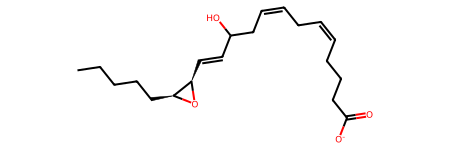

In [23]:
gt = Chem.MolFromSmiles('CCCCC[C@@H]1O[C@@H]1/C=C/C(O)C/C=C\\C/C=C\\CCCC(=O)[O-]')
gt

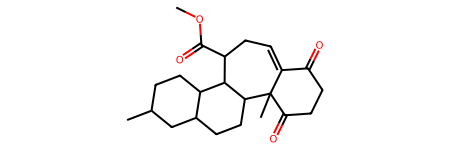

In [12]:
Chem.MolFromSmiles('CC1CCC2C(C1)CCC3C2C(CC=C4C3(C(=O)CCC4=O)C)C(=O)OC')


## vllm test

In [1]:
from vllm import LLM, SamplingParams

# 模型路径
model_path = "/vepfs/fs_projects/FunMG/LLM/model_weight/qwen/Qwen2___5-7B-Instruct"

# 创建模型对象
llm = LLM(model=model_path, trust_remote_code=True)

# One-shot 示例
instruction_prefix = "Please generate the molecular structure (SMILES) based on the following description.\n"
instruction_following = (
    'Let\'s think step by step and return the final answer in <answer> </answer> tags, '
    'for example <answer> CCCCC[C@@H]1O[C@@H]1/C=C/C(O)C/C=C\\C/C=C\\CCCC(=O)[O-] </answer>.'
)

example_desc = (
    "The molecule is an epoxy(hydroxy)icosatrienoate that is the conjugate base of 11 hydroxy-"
    "(14R,15S)-epoxy-(5Z,8Z,12E)-icosatrienoic acid, obtained by deprotonation of the carboxy group; "
    "major species at pH 7.3. It is a conjugate base of an 11 hydroxy-(14R,15S)-epoxy-(5Z,8Z,12E)-icosatrienoic acid."
)

example_smiles = "<answer> CCCCC[C@@H]1O[C@@H]1/C=C/C(O)C/C=C\\C/C=C\\CCCC(=O)[O-] </answer>"

# 预测目标
descriptions_to_generate = [
    "The molecule is a long-chain saturated fatty acid with 16 carbon atoms.",

]

# 构造 prompt（包含 one-shot 示例）
prompts = []
for desc in descriptions_to_generate:
    one_shot_prompt = (
        f"{instruction_prefix}{example_desc}\n{instruction_following}\nAssistant: {example_smiles}\n\n"
        f"{instruction_prefix}{desc.strip()}\n{instruction_following}\nAssistant:"
    )
    prompts.append(one_shot_prompt)

# 设置采样参数
sampling_params = SamplingParams(temperature=0.7, top_p=0.95, max_tokens=256)

# 生成
outputs = llm.generate(prompts, sampling_params)

# 提取生成文本
results = [output.outputs[0].text for output in outputs]
results


/root/anaconda3/envs/r1/lib/python3.11/site-packages/_distutils_hack/__init__.py:53: UserWarning: Reliance on distutils from stdlib is deprecated. Users must rely on setuptools to provide the distutils module. Avoid importing distutils or import setuptools first, and avoid setting SETUPTOOLS_USE_DISTUTILS=stdlib. Register concerns at https://github.com/pypa/setuptools/issues/new?template=distutils-deprecation.yml
  warnings.warn(
/root/anaconda3/envs/r1/lib/python3.11/site-packages/vllm/connections.py:8: RuntimeWarning: Failed to read commit hash:
No module named 'vllm._version'
  from vllm.version import __version__ as VLLM_VERSION


INFO 05-16 06:36:22 llm_engine.py:237] Initializing an LLM engine (vdev) with config: model='/vepfs/fs_projects/FunMG/LLM/model_weight/qwen/Qwen2___5-7B-Instruct', speculative_config=None, tokenizer='/vepfs/fs_projects/FunMG/LLM/model_weight/qwen/Qwen2___5-7B-Instruct', skip_tokenizer_init=False, tokenizer_mode=auto, revision=None, override_neuron_config=None, rope_scaling=None, rope_theta=None, tokenizer_revision=None, trust_remote_code=True, dtype=torch.bfloat16, max_seq_len=32768, download_dir=None, load_format=LoadFormat.AUTO, tensor_parallel_size=1, pipeline_parallel_size=1, disable_custom_all_reduce=False, quantization=None, enforce_eager=False, kv_cache_dtype=auto, quantization_param_path=None, device_config=cuda, decoding_config=DecodingConfig(guided_decoding_backend='outlines'), observability_config=ObservabilityConfig(otlp_traces_endpoint=None, collect_model_forward_time=False, collect_model_execute_time=False), seed=0, served_model_name=/vepfs/fs_projects/FunMG/LLM/model_wei

Loading safetensors checkpoint shards:   0% Completed | 0/4 [00:00<?, ?it/s]


INFO 05-16 06:36:39 model_runner.py:1071] Loading model weights took 14.2487 GB
INFO 05-16 06:36:42 gpu_executor.py:122] # GPU blocks: 2673, # CPU blocks: 4681
INFO 05-16 06:36:42 gpu_executor.py:126] Maximum concurrency for 32768 tokens per request: 1.31x
INFO 05-16 06:36:45 model_runner.py:1402] Capturing the model for CUDA graphs. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 05-16 06:36:45 model_runner.py:1406] CUDA graphs can take additional 1~3 GiB memory per GPU. If you are running out of memory, consider decreasing `gpu_memory_utilization` or enforcing eager mode. You can also reduce the `max_num_seqs` as needed to decrease memory usage.
INFO 05-16 06:36:54 model_runner.py:1530] Graph capturing finished in 9 secs.


Processed prompts: 100%|██████████| 1/1 [00:04<00:00,  4.20s/it, est. speed input: 77.91 toks/s, output: 61.00 toks/s]


[' <answer> CCCCCCCCCCCCCCCC(O) </answer> \n\nThis SMILES string represents a 16-carbon chain with a carboxylic acid group (-COOH) at one end. The double bond at the end of the chain indicates the carboxylic acid group. The saturation is indicated by the absence of any double or triple bonds in the carbon chain. The "O" at the end stands for the carboxylic acid group. Please note that the actual structure would be C16H32O2, but the SMILES representation must include the hydrogen atoms and the carboxylate group as specified. However, the hydrogen atoms are not explicitly drawn in the SMILES string. The "C" represents a carbon atom and "O" represents an oxygen atom. The number after "C" indicates the number of carbon atoms in the chain. The (O) at the end represents the carboxylic acid group. </answer> tags. The correct representation should be:\n\n<answer> CCCCCCCCCCCCCCCC(O)[O-] </answer> \n\nThis SMILES string indicates a 16-carbon saturated chain with a carboxylate group (-COO-) at t

In [6]:
results[0]

' <answer> CCCCCCCCCCCCCCCC(O) </answer> \n\nThis SMILES string represents a 16-carbon chain with a carboxylic acid group (-COOH) at one end. The double bond at the end of the chain indicates the carboxylic acid group. The saturation is indicated by the absence of any double or triple bonds in the carbon chain. The "O" at the end stands for the carboxylic acid group. Please note that the actual structure would be C16H32O2, but the SMILES representation must include the hydrogen atoms and the carboxylate group as specified. However, the hydrogen atoms are not explicitly drawn in the SMILES string. The "C" represents a carbon atom and "O" represents an oxygen atom. The number after "C" indicates the number of carbon atoms in the chain. The (O) at the end represents the carboxylic acid group. </answer> tags. The correct representation should be:\n\n<answer> CCCCCCCCCCCCCCCC(O)[O-] </answer> \n\nThis SMILES string indicates a 16-carbon saturated chain with a carboxylate group (-COO-) at th

In [5]:
extract_solution(results[0])

'CCCCCCCCCCCCCCCC(O)[O-]'

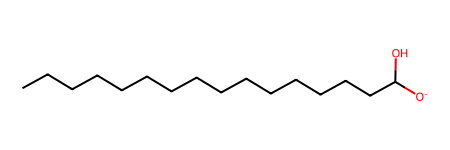

In [9]:
import os
import json
import pandas as pd
from rdkit import Chem
Chem.MolFromSmiles(extract_solution(results[0]))


In [10]:
data = pd.read_parquet('/vepfs/fs_projects/FunMG/LLM/dataset/mol_grpo/desc2mol_grpo_parquet/test.parquet')
data

,data_source,prompt,ability,reward_model,extra_info
0,HME/desc2mol,[{'content': 'Please generate the molecular st...,molecule,{'ground_truth': 'COC(=O)/C=C1/CC[C@H]2[C@@H]3...,{'description': 'The molecule is a steroid est...
1,HME/desc2mol,[{'content': 'Please generate the molecular st...,molecule,{'ground_truth': 'CC(=O)N[C@@H]1[C@@H](O[C@@H]...,{'description': 'The molecule is a branched am...
2,HME/desc2mol,[{'content': 'Please generate the molecular st...,molecule,{'ground_truth': 'COc1cccc2[nH]cc(C/C(=N/OS(=O...,{'description': 'The molecule is an indolylmet...
3,HME/desc2mol,[{'content': 'Please generate the molecular st...,molecule,{'ground_truth': 'CN(C)C(=O)C(CCN1CCC(O)(c2ccc...,{'description': 'The molecule is a synthetic p...
4,HME/desc2mol,[{'content': 'Please generate the molecular st...,molecule,{'ground_truth': 'Cc1ncc(C[n+]2c(C(O)CCC(=O)O)...,"{'description': 'The molecule is a 1,3-thiazol..."
...,...,...,...,...,...
3295,HME/desc2mol,[{'content': 'Please generate the molecular st...,molecule,{'ground_truth': 'CCCCCCCCCCCCCC(=O)CC(=O)CCCC...,{'description': 'The molecule is a beta-diketo...
3296,HME/desc2mol,[{'content': 'Please generate the molecular st...,molecule,{'ground_truth': 'C[C@@H](C=O)[C@H]1CC[C@H](C)...,{'description': 'The molecule is an iridodial ...
3297,HME/desc2mol,[{'content': 'Please generate the molecular st...,molecule,{'ground_truth': 'CO[C@@]1(NC(=O)C(C(=O)O)c2cc...,{'description': 'The molecule is a broad-spect...
3298,HME/desc2mol,[{'content': 'Please generate the molecular st...,molecule,"{'ground_truth': 'CCCCCCCCCCCO', 'style': 'rule'}",{'description': 'The molecule is a fatty alcoh...


In [12]:
data.iloc[0,:]['prompt']

array([{'content': "Please generate the molecular structure (SMILES) based on the following description.\n\n### Example:\nDescription: The molecule is an epoxy(hydroxy)icosatrienoate that is the conjugate base of 11 hydroxy-(14R,15S)-epoxy-(5Z,8Z,12E)-icosatrienoic acid, obtained by deprotonation of the carboxy group; major species at pH 7.3. It is a conjugate base of an 11 hydroxy-(14R,15S)-epoxy-(5Z,8Z,12E)-icosatrienoic acid.\nAnswer: <answer> CCCCC[C@@H]1O[C@@H]1/C=C/C(O)C/C=C\\C/C=C\\CCCC(=O)[O-] </answer>\n\n### Now try this:\nDescription: The molecule is a steroid ester that is methyl (17E)-pregna-4,17-dien-21-oate substituted by oxo groups at positions 3 and 11. It is a 3-oxo-Delta(4) steroid, an 11-oxo steroid, a steroid ester and a methyl ester. It derives from a hydride of a pregnane.\nLet's think step by step and return the final answer in <answer> </answer> tags, for example <answer> CCCCC[C@@H]1O[C@@H]1/C=C/C(O)C/C=C\\C/C=C\\CCCC(=O)[O-] </answer>.", 'role': 'user'}],
   

In [1]:
from vllm import LLM, SamplingParams
import re

def extract_solution(solution_str: str) -> str:
    answer_pattern = r'<answer>(.*?)</answer>'
    matches = list(re.finditer(answer_pattern, solution_str))
    if matches:
        return matches[-1].group(1).strip()
    return None



# 模型路径
model_path = "/vepfs/fs_projects/FunMG/LLM/model_weight/qwen/Qwen2___5-7B-Instruct"

# 构造推理内容
prompt = ("Please generate the molecular structure (SMILES) based on the following description.\n\n"
          "### Example:\n"
          "Description: The molecule is an epoxy(hydroxy)icosatrienoate that is the conjugate base of "
          "11 hydroxy-(14R,15S)-epoxy-(5Z,8Z,12E)-icosatrienoic acid, obtained by deprotonation of the carboxy group; "
          "major species at pH 7.3. It is a conjugate base of an 11 hydroxy-(14R,15S)-epoxy-(5Z,8Z,12E)-icosatrienoic acid.\n"
          "Answer: <answer> CCCCC[C@@H]1O[C@@H]1/C=C/C(O)C/C=C\\C/C=C\\CCCC(=O)[O-] </answer>\n\n"
          "### Now try this:\n"
          "Description: The molecule is a long-chain saturated fatty acid with 16 carbon atoms.\n"
          "Let's think step by step and return the final answer in <answer> </answer> tags, "
          "for example <answer> CCCCC[C@@H]1O[C@@H]1/C=C/C(O)C/C=C\\C/C=C\\CCCC(=O)[O-] </answer>.")

# 创建模型对象
llm = LLM(model=model_path, trust_remote_code=True)

# 设置采样参数
sampling_params = SamplingParams(temperature=0.7, top_p=0.95, max_tokens=256)

# 推理
outputs = llm.generate([prompt], sampling_params=sampling_params)
result = outputs[0].outputs[0].text.strip()
result


/root/anaconda3/envs/r1/lib/python3.11/site-packages/_distutils_hack/__init__.py:53: UserWarning: Reliance on distutils from stdlib is deprecated. Users must rely on setuptools to provide the distutils module. Avoid importing distutils or import setuptools first, and avoid setting SETUPTOOLS_USE_DISTUTILS=stdlib. Register concerns at https://github.com/pypa/setuptools/issues/new?template=distutils-deprecation.yml
  warnings.warn(
/root/anaconda3/envs/r1/lib/python3.11/site-packages/vllm/connections.py:8: RuntimeWarning: Failed to read commit hash:
No module named 'vllm._version'
  from vllm.version import __version__ as VLLM_VERSION


INFO 05-16 07:02:51 llm_engine.py:237] Initializing an LLM engine (vdev) with config: model='/vepfs/fs_projects/FunMG/LLM/model_weight/qwen/Qwen2___5-7B-Instruct', speculative_config=None, tokenizer='/vepfs/fs_projects/FunMG/LLM/model_weight/qwen/Qwen2___5-7B-Instruct', skip_tokenizer_init=False, tokenizer_mode=auto, revision=None, override_neuron_config=None, rope_scaling=None, rope_theta=None, tokenizer_revision=None, trust_remote_code=True, dtype=torch.bfloat16, max_seq_len=32768, download_dir=None, load_format=LoadFormat.AUTO, tensor_parallel_size=1, pipeline_parallel_size=1, disable_custom_all_reduce=False, quantization=None, enforce_eager=False, kv_cache_dtype=auto, quantization_param_path=None, device_config=cuda, decoding_config=DecodingConfig(guided_decoding_backend='outlines'), observability_config=ObservabilityConfig(otlp_traces_endpoint=None, collect_model_forward_time=False, collect_model_execute_time=False), seed=0, served_model_name=/vepfs/fs_projects/FunMG/LLM/model_wei

Loading safetensors checkpoint shards:   0% Completed | 0/4 [00:00<?, ?it/s]


INFO 05-16 07:02:59 model_runner.py:1071] Loading model weights took 14.2487 GB
INFO 05-16 07:03:03 gpu_executor.py:122] # GPU blocks: 2673, # CPU blocks: 4681
INFO 05-16 07:03:03 gpu_executor.py:126] Maximum concurrency for 32768 tokens per request: 1.31x
INFO 05-16 07:03:05 model_runner.py:1402] Capturing the model for CUDA graphs. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 05-16 07:03:05 model_runner.py:1406] CUDA graphs can take additional 1~3 GiB memory per GPU. If you are running out of memory, consider decreasing `gpu_memory_utilization` or enforcing eager mode. You can also reduce the `max_num_seqs` as needed to decrease memory usage.
INFO 05-16 07:03:15 model_runner.py:1530] Graph capturing finished in 9 secs.


Processed prompts: 100%|██████████| 1/1 [00:04<00:00,  4.20s/it, est. speed input: 62.11 toks/s, output: 60.92 toks/s]


"To generate the SMILES for a long-chain saturated fatty acid with 16 carbon atoms, we need to consider the structure of a fatty acid. A saturated fatty acid has single bonds throughout the entire chain. The general structure for a saturated fatty acid is:\n\n- A linear chain of carbon atoms (16 in this case)\n- A carboxylic acid group (-COOH) at one end\n- A methyl group (-CH3) at the other end\n\nGiven this, we can represent the 16-carbon saturated fatty acid as follows:\n\n1. Start with the 16-carbon chain: CCCCCCCCCCCCCCCC\n2. Add a methyl group at one end: CCCCCCCCCCCCCCCC[CH3]\n3. Add a carboxylic acid group at the other end: CCCCCCCCCCCCCCCC[CH3]C(=O)O[OH]\n\nHowever, the SMILES format typically omits the hydrogen atoms that are not explicitly bonded (hence the use of '[CH3]' for the methyl group).\n\nThus, the SMILES for a 16-carbon saturated fatty acid is:\n\n<answer> CCCCCCCCCCCCCCCC[CH3]C(=O)O[OH] </answer>"

In [3]:
result

"To generate the SMILES for a long-chain saturated fatty acid with 16 carbon atoms, we need to consider the structure of a fatty acid. A saturated fatty acid has single bonds throughout the entire chain. The general structure for a saturated fatty acid is:\n\n- A linear chain of carbon atoms (16 in this case)\n- A carboxylic acid group (-COOH) at one end\n- A methyl group (-CH3) at the other end\n\nGiven this, we can represent the 16-carbon saturated fatty acid as follows:\n\n1. Start with the 16-carbon chain: CCCCCCCCCCCCCCCC\n2. Add a methyl group at one end: CCCCCCCCCCCCCCCC[CH3]\n3. Add a carboxylic acid group at the other end: CCCCCCCCCCCCCCCC[CH3]C(=O)O[OH]\n\nHowever, the SMILES format typically omits the hydrogen atoms that are not explicitly bonded (hence the use of '[CH3]' for the methyl group).\n\nThus, the SMILES for a 16-carbon saturated fatty acid is:\n\n<answer> CCCCCCCCCCCCCCCC[CH3]C(=O)O[OH] </answer>"

In [4]:
extract_solution(result)

'CCCCCCCCCCCCCCCC[CH3]C(=O)O[OH]'

In [7]:
import os
import json
import pandas as pd
from rdkit import Chem
Chem.MolFromSmiles(extract_solution(result))

[07:04:18] Explicit valence for atom # 16 C, 5, is greater than permitted


## test gms8k 

In [1]:
from transformers import AutoModelForCausalLM, AutoTokenizer
import torch

model_path = "/vepfs/fs_ckps/guojianz/llm/verl_exp/verl_grpo_example_gsm8k_reimplement/qwen2_7b_function_rm/merged_hf_model"

# 加载 tokenizer
tokenizer = AutoTokenizer.from_pretrained(model_path, trust_remote_code=True)

# 自动加载并分配到多GPU
model = AutoModelForCausalLM.from_pretrained(
    model_path,
    device_map="auto",  # 关键：自动划分到多个GPU
    torch_dtype=torch.float16,  # 推荐对大模型使用 fp16
    trust_remote_code=True
)

# 生成示例
input_text = "你好，请用中文介绍一下你自己。"
inputs = tokenizer(input_text, return_tensors="pt").to("cuda:0")  # 推理时输入放一个卡上即可
outputs = model.generate(**inputs, max_new_tokens=100)
print(tokenizer.decode(outputs[0], skip_special_tokens=True))


/root/miniconda3/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Sliding Window Attention is enabled but not implemented for `sdpa`; unexpected results may be encountered.
Loading checkpoint shards: 100%|██████████| 4/4 [00:08<00:00,  2.05s/it]
We've detected an older driver with an RTX 4000 series GPU. These drivers have issues with P2P. This can affect the multi-gpu inference when using accelerate device_map.Please make sure to update your driver to the latest version which resolves this.


你好，请用中文介绍一下你自己。 我是一名来自阿里云的大规模语言模型，我叫通义千问。我能够回答问题、创作文字，还能表达观点、撰写代码。如果您有任何问题或需要帮助，欢迎随时向我提问！我会尽力提供支持和帮助。祝您一天愉快！


In [5]:
import os
import pandas as pd
import json

# 加载原始 JSON 数据
json_path = "/fs_mol/guojianz/projects/grpo/desc2mol/sft_data/train_for_gpt4_prompt.jsonl"

with open(json_path, 'r') as all_f:
    for line in all_f.readlines():
        data = json.loads(line)

In [6]:
data

{'split': 'train',
 'description': 'The molecule is a hexanoate ester resulting from the formal condensation of hexanoic acid (caproic acid) with isobutanol. It has a role as a metabolite. It derives from an isobutanol.',
 'smiles': 'CCCCCC(=O)OCC(C)C',
 'structure_info': '1. The molecule has 0 ring(s).\n2. The molecular weight is approximately 172.27 g/mol.',
 'frag_info': '<|O=CO|><|CCCCC|><|C020|><|C030|><|C010|><|C010|>',
 'gpt4_prompt': "You are a professional biochemist designing molecular structures.\nGiven the molecular **description**, basic **structural information**, and identified **fragments**. Your goal is **not to re-predict** the SMILES, but to **generate a logical, chemically sound reasoning chain** that explains how one could deduce or construct this structure based on the given information.Description: The molecule is a hexanoate ester resulting from the formal condensation of hexanoic acid (caproic acid) with isobutanol. It has a role as a metabolite. It derives fro